# Project : predict "Sales" 

# Import Libraries & Read Dataset

In [1]:
import requests

url = 'https://raw.githubusercontent.com/lko9911/Kaggle/master/Compare_Regression_models.py'

r = requests.get(url)

with open('Compare_Regression_models.py', 'w') as f:
    f.write(r.text)

In [2]:
# For Compare modeling
from Compare_Regression_models import evaluate_models

# For Standard data
from sklearn.preprocessing import StandardScaler

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# For Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_excel('/kaggle/input/lamborghini-sales-and-stocks/LamboData.xlsx')
df

,Year,Sales,Growth,Open,High,Low,Close
0,2006,2087,NaN,5.50,11.30,5.50,11.30
1,2007,2406,15.285098,11.80,26.30,11.80,23.05
2,2008,2430,0.997506,22.43,51.13,22.00,35.90
3,2009,1515,-37.654321,34.48,37.50,11.18,11.18
4,2010,1302,-14.059406,10.75,15.38,8.49,14.80
5,2011,1602,23.041475,15.04,19.58,12.40,13.35
6,2012,2083,30.024969,14.03,21.31,14.03,21.31
7,2013,2121,1.824292,21.96,26.97,17.70,26.97
8,2014,2530,19.283357,26.28,26.80,19.73,22.17
9,2015,3245,28.260870,21.06,25.91,12.84,15.49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Sales   18 non-null     int64  
 2   Growth  17 non-null     float64
 3   Open    18 non-null     float64
 4   High    18 non-null     float64
 5   Low     18 non-null     float64
 6   Close   18 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,18.0,2014.500000,5.338539,2006.000000,2010.250000,2014.5000,2018.750000,2023.000000
Sales,18.0,4318.222222,2999.678150,1302.000000,2095.500000,2887.5000,7010.000000,10112.000000
Growth,17.0,11.785750,21.049916,-37.654321,1.824292,10.3558,23.041475,50.720839
Open,18.0,18.780000,7.234203,5.500000,14.277500,18.2400,21.870000,34.480000
High,18.0,24.897778,9.508512,11.300000,19.685000,22.0800,26.927500,51.130000
Low,18.0,14.541111,5.357938,5.500000,11.335000,13.4350,16.065000,29.200000
Close,18.0,19.150556,6.621486,11.180000,14.777500,17.7350,21.955000,35.900000


# Data Preprocessing

In [6]:
df.isna().mean()

Year      0.000000
Sales     0.000000
Growth    0.055556
Open      0.000000
High      0.000000
Low       0.000000
Close     0.000000
dtype: float64

In [7]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 1 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17 non-null     int64  
 1   Sales   17 non-null     int64  
 2   Growth  17 non-null     float64
 3   Open    17 non-null     float64
 4   High    17 non-null     float64
 5   Low     17 non-null     float64
 6   Close   17 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.1 KB


# Compare models

In [8]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

evaluate_models(X,y)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 13, number of used features: 0
[LightGBM] [Info] Start training from score 4576.076923
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

,Model,RMSE,R²
0,Linear Regression,1782.023761,0.647733
1,Ridge Regression,2096.006595,0.512662
2,Lasso Regression,1814.380193,0.634825
3,ElasticNet,1452.796756,0.765871
4,Decision Tree Regressor,1754.240505,0.658632
5,Random Forest Regressor,531.028880,0.968719
6,Support Vector Machine Regressor,3058.158480,-0.037444
7,K-Nearest Neighbors Regressor,2055.812409,0.531174
8,Gradient Boosting Regressor,480.223846,0.974418
9,XGBoost Regressor,811.772465,0.926901


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

# Evaluating Gradient Boosting Regressor

In [10]:
y_pred = gb_regressor.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE : ", rmse)
print("R² value:", r2)

RMSE :  499.525709056259
R² value: 0.9723203661709098


In [11]:
comparison = pd.DataFrame({'actual': y_test, 'pred': y_pred})
comparison

,actual,pred
1,2406,1664.681116
2,2430,1926.081468
6,2083,1793.995206
16,9233,8899.694751


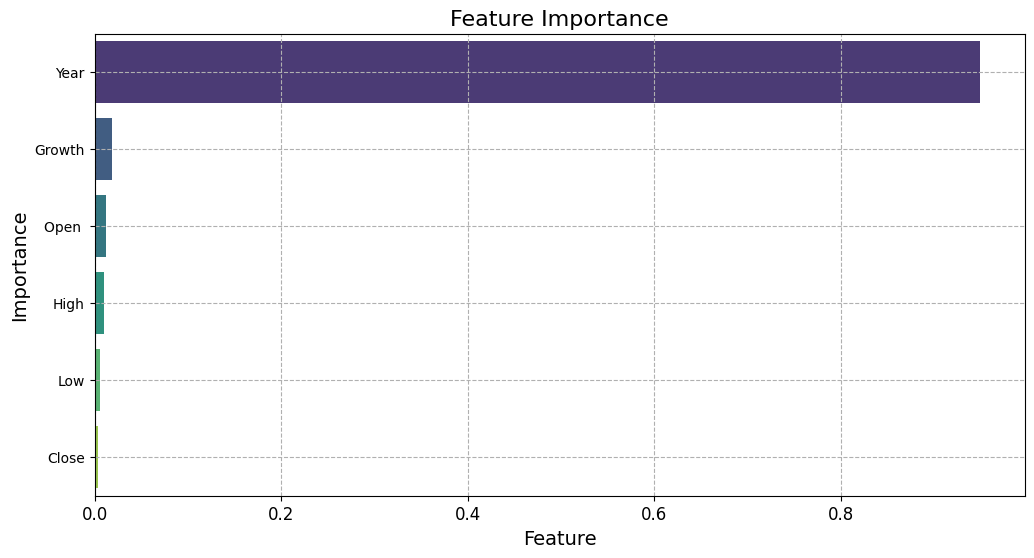

In [12]:
feature_importance = gb_regressor.feature_importances_

features = X_train.columns
importances = pd.DataFrame({'Features': features, 'Importance': feature_importance})

importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))  
sns.barplot(data=importances, x='Importance', y='Features', palette="viridis")
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.grid(linestyle='--')
plt.show()

# Thanks